## 1. Library Imports

In [1]:
## 1. Library Imports

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (
    AdaBoostClassifier, 
    GradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

# Model evaluation and tuning
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import (
    StratifiedKFold, 
    cross_val_score, 
    RandomizedSearchCV
)

## 2. Data Loading and Initial Exploration

In [2]:
# Load datasets
df_train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
df_submission = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')

In [3]:
def display_dataset_info(dataframe):
    """
    Display comprehensive information about a dataframe
    
    Args:
        dataframe: Pandas DataFrame to analyze
    """
    print("=" * 80)
    print("DATASET OVERVIEW")
    print("=" * 80)
    print(f"Shape of the dataset: {dataframe.shape}")
    print()

    print("=" * 80)
    print("COLUMN DATA TYPES AND NON-NULL COUNTS")
    print("=" * 80)
    dataframe.info()
    print()

    print("=" * 80)
    print("MISSING VALUES SUMMARY")
    print("=" * 80)
    missing_values = dataframe.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print(missing_values)
    else:
        print("No missing values found!")
    print()

    print("=" * 80)
    print("STATISTICAL SUMMARY (NUMERICAL COLUMNS)")
    print("=" * 80)
    print(dataframe.describe())
    print()

    print("=" * 80)
    print("STATISTICAL SUMMARY (CATEGORICAL COLUMNS)")
    print("=" * 80)
    categorical_cols = dataframe.select_dtypes(include=['object', 'category'])
    if not categorical_cols.empty:
        print(categorical_cols.describe())
    else:
        print("No categorical columns found!")
    print()

    print("=" * 80)
    print("FIRST FEW ROWS OF THE DATASET")
    print("=" * 80)
    print(dataframe.head())
    print()

In [4]:
# Get basic information about the training dataset
display_dataset_info(df_train)

DATASET OVERVIEW
Shape of the dataset: (2190, 13)

COLUMN DATA TYPES AND NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB

MISSING VALUES SUMMARY
No missing values found!

STATISTICAL SUMMARY (NUMERICAL COLUMNS)
 

## 3. Data Visualization and Analysis

In [5]:
# Visualize distributions of numerical features
def plot_numerical_distributions(dataframe):
    """
    Create histograms for all numerical features in the dataframe
    
    Args:
        dataframe: Pandas DataFrame with features to visualize
    """
    numerical_columns = dataframe.select_dtypes(include=['number']).columns.tolist()
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(dataframe[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


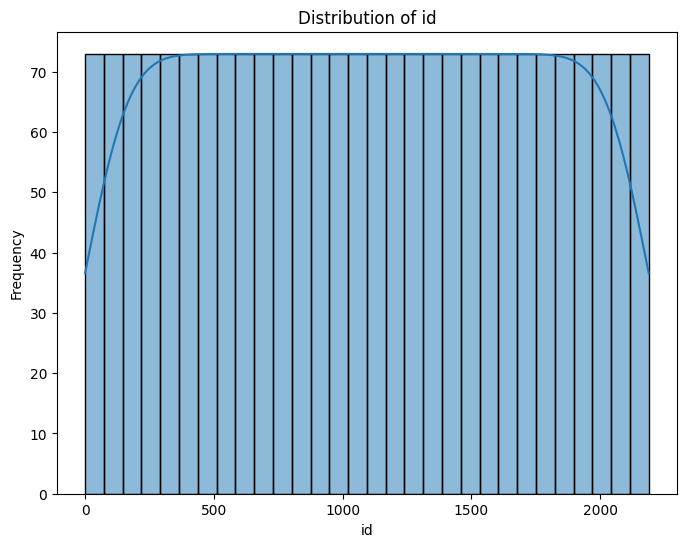

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


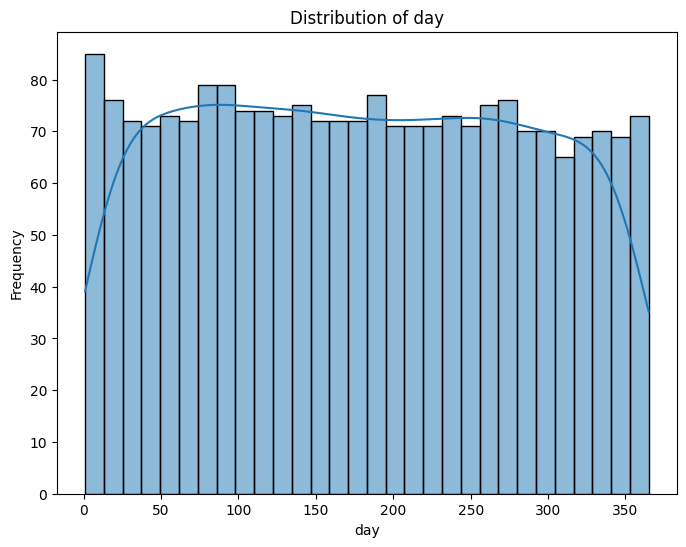

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


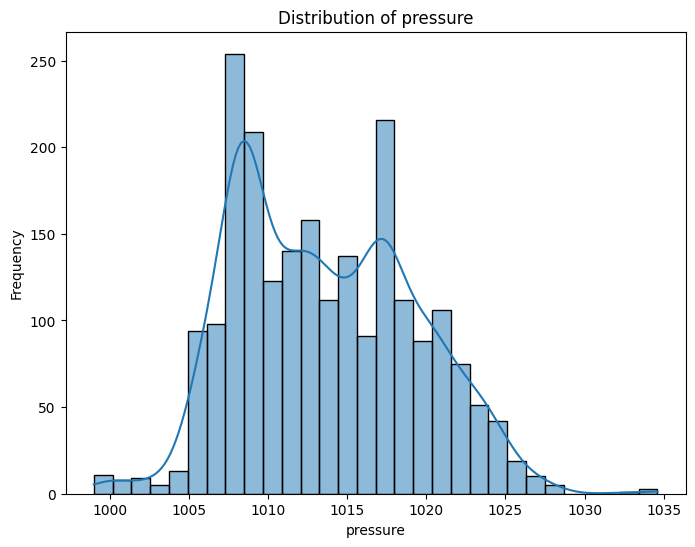

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


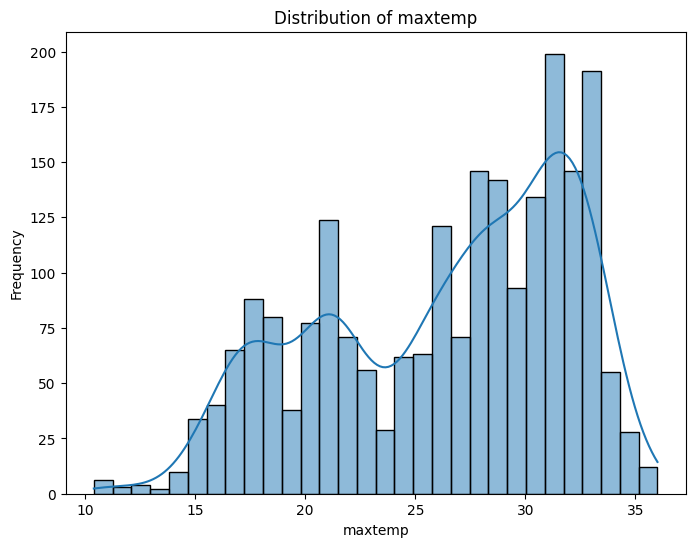

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


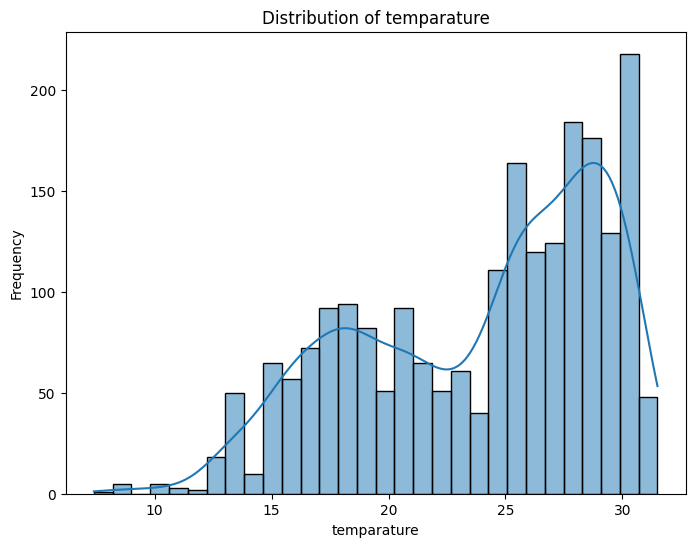

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


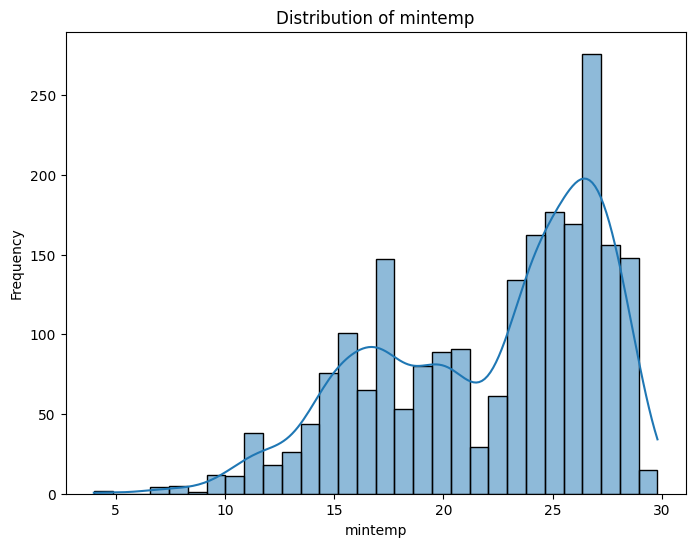

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


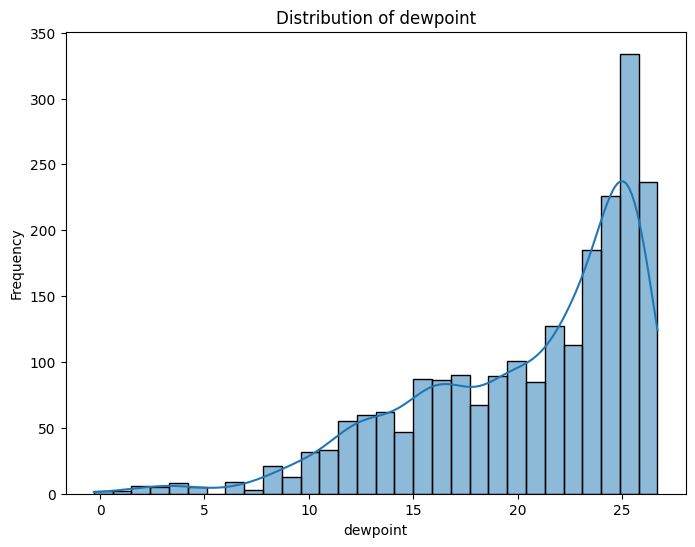

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


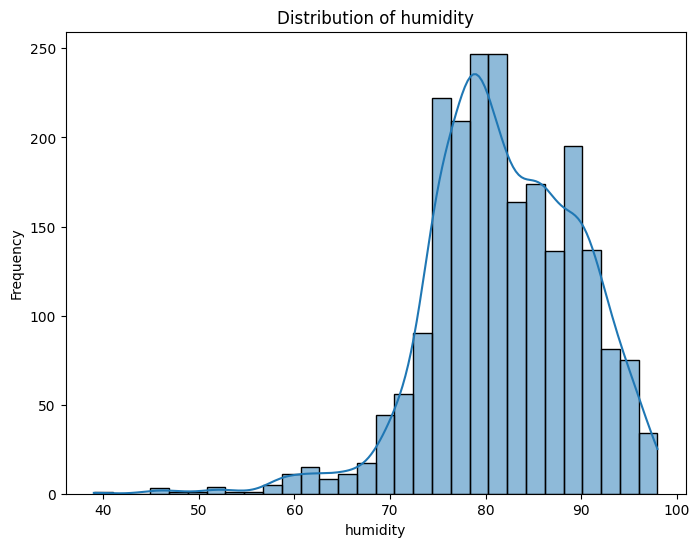

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


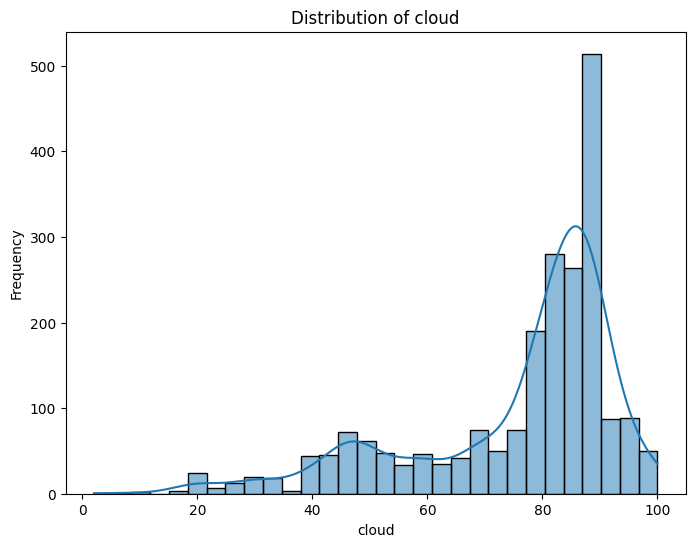

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


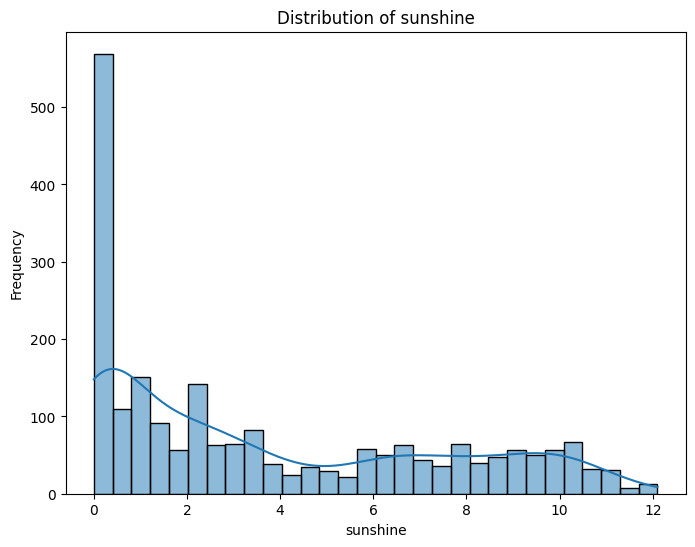

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


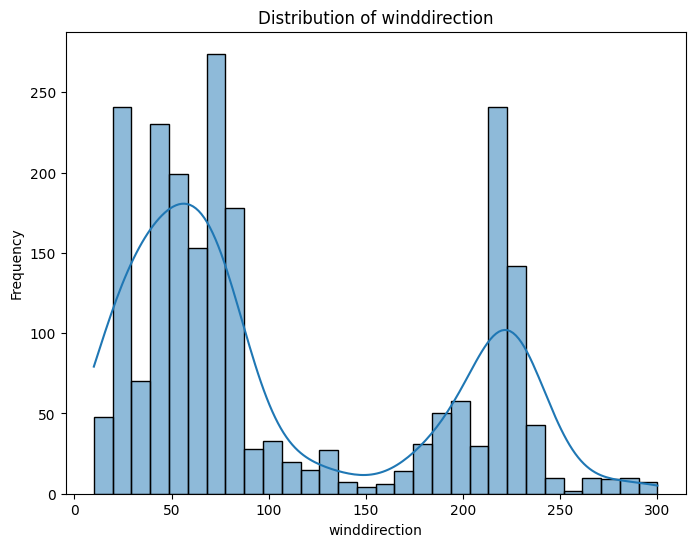

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


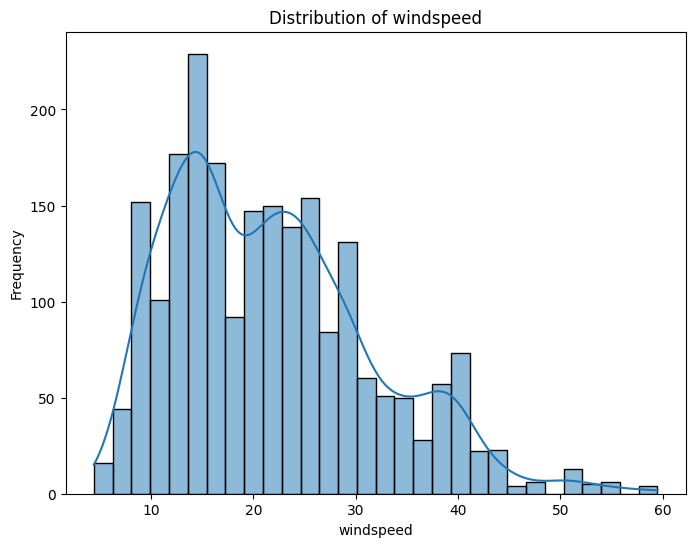

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


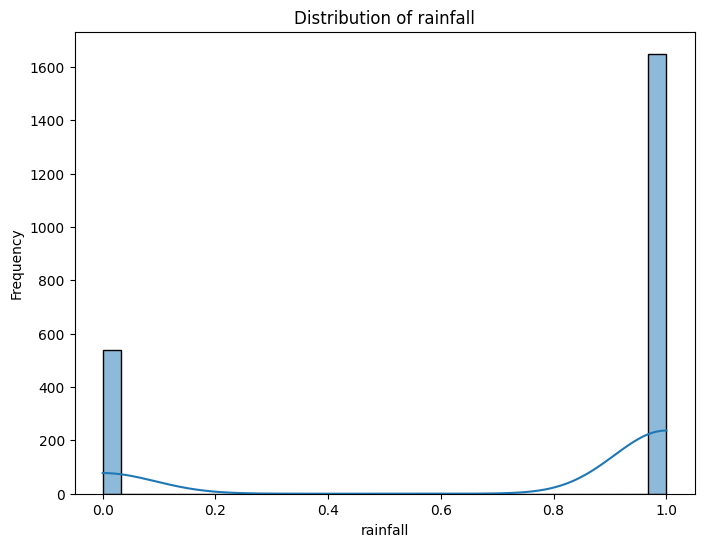

In [6]:
# Visualize numerical feature distributions
plot_numerical_distributions(df_train)

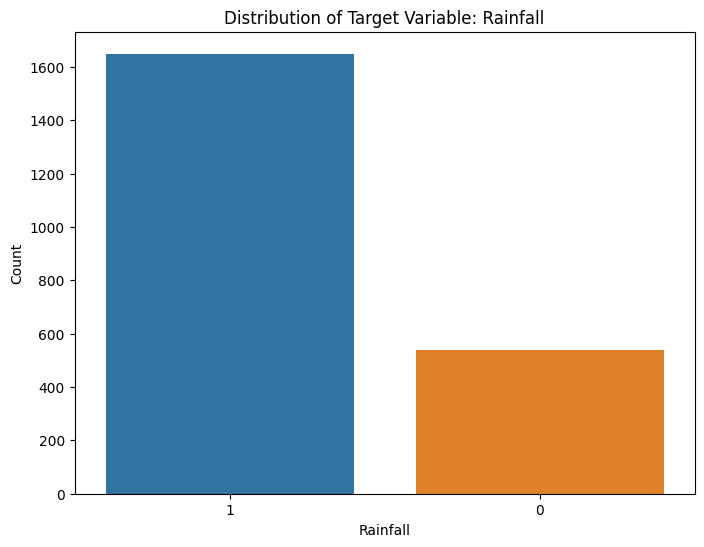

In [7]:
# Visualize target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='rainfall', order=df_train['rainfall'].value_counts().index)
plt.title(f'Distribution of Target Variable: Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.show()

In [8]:
# Generate and plot correlation matrix
def analyze_correlations(dataframe):
    """
    Generate and visualize correlation matrix
    
    Args:
        dataframe: Pandas DataFrame to analyze
    """
    corr_matrix = dataframe.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()
    
    return corr_matrix

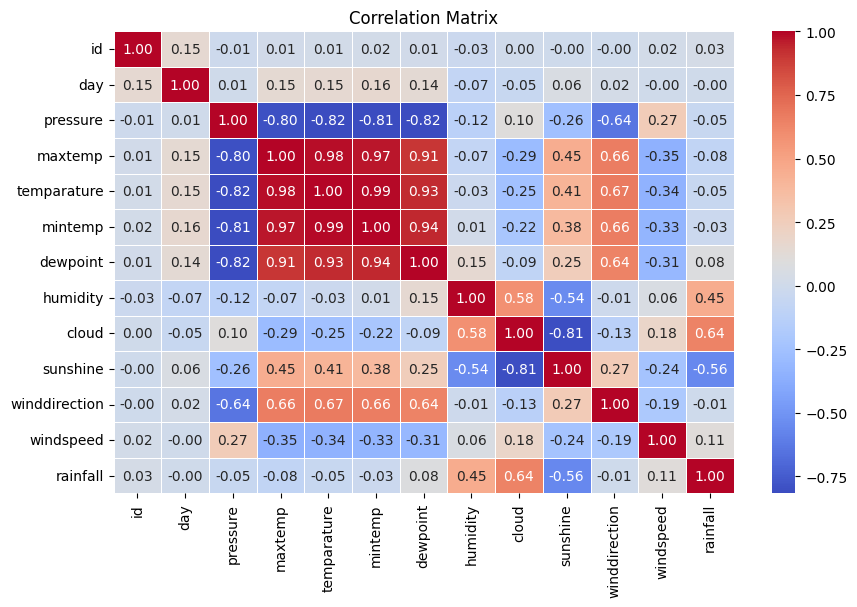

In [9]:
# Generate correlation matrix
correlation_matrix = analyze_correlations(df_train)

In [10]:
# Calculate Variance Inflation Factor (VIF) to detect multicollinearity
def calculate_vif(dataframe):
    """
    Calculate Variance Inflation Factor for numerical features
    
    Args:
        dataframe: Pandas DataFrame with features to analyze
        
    Returns:
        DataFrame with VIF values for each feature
    """
    X_vif = dataframe.select_dtypes(include=['number'])
    X_vif = add_constant(X_vif)
    
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_vif.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    
    return vif_data

In [11]:
# Calculate VIF values
vif_results = calculate_vif(df_train)
print(vif_results)

         Variable            VIF
0           const  122768.714692
1              id       1.029477
2             day       1.128779
3        pressure       3.633523
4         maxtemp      33.135403
5     temparature      83.216063
6         mintemp      45.517045
7        dewpoint      12.011725
8        humidity       1.887305
9           cloud       3.596036
10       sunshine       3.621802
11  winddirection       1.941244
12      windspeed       1.169007
13       rainfall       1.810595


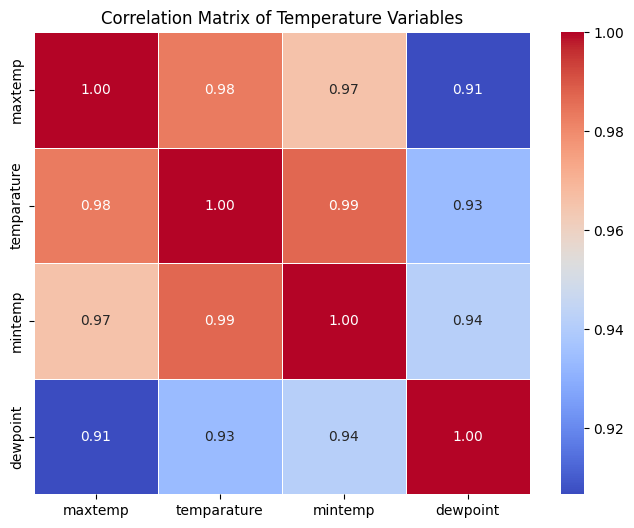

In [12]:
# Analyze highly correlated temperature variables
temp_corr_matrix = df_train[['maxtemp', 'temparature', 'mintemp', 'dewpoint']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(temp_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Temperature Variables")
plt.show()

## 4. Data Preprocessing

In [13]:
# Prepare features and target variable
X_train = df_train.drop(columns=['rainfall'])
y_train = df_train['rainfall']

In [14]:
# Scale features
def scale_features(features):
    """
    Standardize features using StandardScaler
    
    Args:
        features: DataFrame of features to scale
        
    Returns:
        Scaled feature array and the fitted scaler
    """
    feature_scaler = StandardScaler()
    features_scaled = feature_scaler.fit_transform(features)
    
    return features_scaled, feature_scaler

In [15]:
# Apply scaling
X_train_scaled, feature_scaler = scale_features(X_train)

## 5. Dimensionality Reduction with PCA

In [16]:
# Analyze PCA components
def analyze_pca_components(scaled_features):
    """
    Apply PCA and analyze explained variance to determine optimal components
    
    Args:
        scaled_features: Scaled feature array
        
    Returns:
        Fitted PCA object
    """
    # Apply PCA without dimensionality reduction (for analysis)
    pca_analyzer = PCA()
    pca_analyzer.fit_transform(scaled_features)
    
    # Plot explained variance
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca_analyzer.explained_variance_ratio_), marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Components Selection')
    plt.grid(True)
    plt.show()
    
    return pca_analyzer

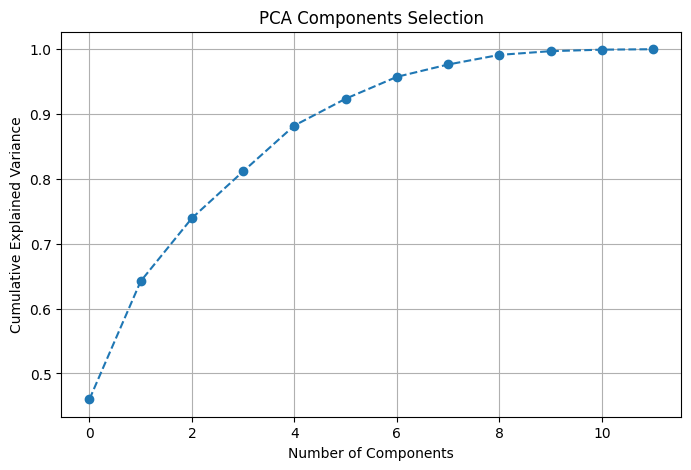

In [17]:
# Analyze PCA components
pca_analyzer = analyze_pca_components(X_train_scaled)

## 6. Balance the Dataset using SMOTE

In [18]:
# Apply SMOTE to handle imbalanced classes
def apply_smote(features, target, random_state=42):
    """
    Balance the dataset using SMOTE
    
    Args:
        features: Feature array
        target: Target variable array
        random_state: Random seed for reproducibility
        
    Returns:
        Balanced features and target arrays
    """
    smote_sampler = SMOTE(sampling_strategy='auto', random_state=random_state)
    features_balanced, target_balanced = smote_sampler.fit_resample(features, target)
    
    return features_balanced, target_balanced

In [19]:
# Apply SMOTE
X_train_balanced, y_train_balanced = apply_smote(X_train_scaled, y_train, random_state=3)

## 7. Apply PCA to Balanced Dataset

In [20]:
# Apply PCA with chosen number of components
def reduce_dimensions(features, n_components=6):
    """
    Reduce dimensionality using PCA
    
    Args:
        features: Feature array
        n_components: Number of components to keep
        
    Returns:
        Reduced feature array and fitted PCA object
    """
    pca_transformer = PCA(n_components=n_components)
    features_reduced = pca_transformer.fit_transform(features)
    
    return features_reduced, pca_transformer

In [21]:
# Apply PCA with 6 components
X_train_reduced, pca_transformer = reduce_dimensions(X_train_balanced, n_components=6)

In [22]:
# Create DataFrame with PCA components
X_train_pca_df = pd.DataFrame(
    X_train_reduced, 
    columns=[f"PC{i+1}" for i in range(6)]
)
X_train_pca_df['target'] = y_train_balanced

## 8. Model Selection - Comparing Different Algorithms

In [23]:
# Prepare final features and target
X_final = X_train_pca_df.drop(columns=['target']).values
y_final = X_train_pca_df['target'].values

In [24]:
# Define models to evaluate
def create_model_dictionary():
    """
    Create a dictionary of machine learning models to evaluate
    
    Returns:
        Dictionary with model names and initialized instances
    """
    models_dict = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Support Vector Machine": SVC(probability=True, random_state=42),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
        "LightGBM": lgb.LGBMClassifier(verbose=-1, random_state=42),
        "SGD Classifier": SGDClassifier(loss='log_loss', random_state=42)
    }
    
    return models_dict

In [25]:
# Evaluate models using cross-validation
def evaluate_models(models_dict, features, target, cv_folds=5, random_state=42):
    """
    Evaluate multiple models using stratified cross-validation
    
    Args:
        models_dict: Dictionary of models to evaluate
        features: Feature array
        target: Target variable array
        cv_folds: Number of cross-validation folds
        random_state: Random seed for reproducibility
        
    Returns:
        Dictionary with model performance metrics
    """
    # Setup cross-validation
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
    
    # Results dictionary
    results = {}
    
    # Evaluate each model
    for name, model in models_dict.items():
        roc_auc_scores = []
        
        for train_idx, test_idx in skf.split(features, target):
            X_train_fold, X_test_fold = features[train_idx], features[test_idx]
            y_train_fold, y_test_fold = target[train_idx], target[test_idx]
            
            # Train the model
            model.fit(X_train_fold, y_train_fold)
            
            # Predict probabilities
            y_pred_proba = model.predict_proba(X_test_fold)[:, 1]
            
            # Calculate ROC AUC
            roc_auc = roc_auc_score(y_test_fold, y_pred_proba)
            roc_auc_scores.append(roc_auc)
        
        # Store results
        results[name] = {
            'mean_roc_auc': np.mean(roc_auc_scores),
            'std_roc_auc': np.std(roc_auc_scores)
        }
        
        print(f"{name}: Mean ROC AUC = {np.mean(roc_auc_scores):.4f}, "
              f"Std = {np.std(roc_auc_scores):.4f}")
    
    return results

In [26]:
# Create model dictionary
models_dict = create_model_dictionary()

In [27]:
# Evaluate all models
model_evaluation_results = evaluate_models(models_dict, X_final, y_final)

Logistic Regression: Mean ROC AUC = 0.8979, Std = 0.0096
Random Forest: Mean ROC AUC = 0.9437, Std = 0.0075
Gradient Boosting: Mean ROC AUC = 0.9067, Std = 0.0098
AdaBoost: Mean ROC AUC = 0.8928, Std = 0.0106
Support Vector Machine: Mean ROC AUC = 0.8997, Std = 0.0127
K-Nearest Neighbors: Mean ROC AUC = 0.9198, Std = 0.0080
Decision Tree: Mean ROC AUC = 0.8155, Std = 0.0073
XGBoost: Mean ROC AUC = 0.9256, Std = 0.0106
LightGBM: Mean ROC AUC = 0.9283, Std = 0.0090
SGD Classifier: Mean ROC AUC = 0.8899, Std = 0.0080


## 9. Hyperparameter Tuning for Best Model

In [28]:
# Define parameter grid for Random Forest
def tune_random_forest(features, target, cv_folds=5, random_state=42):
    """
    Tune Random Forest hyperparameters using RandomizedSearchCV
    
    Args:
        features: Feature array
        target: Target variable array
        random_state: Random seed for reproducibility
        
    Returns:
        Best model and parameters
    """
    # Define parameter search space
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    }

    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)

    
    # Initialize base model
    rf_base = RandomForestClassifier(random_state=random_state)
    
    # Setup randomized search
    random_search = RandomizedSearchCV(
        estimator=rf_base,
        param_distributions=param_grid,
        n_iter=50,  # Number of parameter combinations to try
        scoring='roc_auc',
        cv=skf,  # Cross-validation folds
        verbose=2,
        n_jobs=-1,  # Use all CPU cores
        random_state=random_state
    )
    
    # Perform search
    random_search.fit(features, target)
    
    # Print results
    print("Best parameters found:", random_search.best_params_)
    print("Best ROC AUC score:", random_search.best_score_)
    
    return random_search.best_estimator_, random_search.best_params_

In [29]:
# Tune Random Forest hyperparameters
best_rf_model, best_rf_params = tune_random_forest(X_final, y_final)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best ROC AUC score: 0.9445858585858586


## 10. Train Final Model with Best Parameters

In [30]:
# Train final model with best parameters
def train_final_model(features, target, best_params, random_state=42):
    """
    Train final model using the best parameters found
    
    Args:
        features: Feature array
        target: Target variable array
        best_params: Dictionary of best parameters
        random_state: Random seed for reproducibility
        
    Returns:
        Trained model
    """
    final_model = RandomForestClassifier(**best_params, random_state=random_state)
    final_model.fit(features, target)
    
    return final_model

In [31]:
# Train final model
final_model = train_final_model(X_final, y_final, best_rf_params)

## 11. Process Test Data and Generate Predictions

In [32]:
# Process test data using the same transformations
def process_test_data(test_df, scaler, pca_transformer):
    """
    Apply the same preprocessing steps to test data
    
    Args:
        test_df: Test DataFrame
        scaler: Fitted StandardScaler
        pca_transformer: Fitted PCA
        
    Returns:
        Processed test features
    """
    # Handle missing values if necessary
    test_df_processed = test_df.copy()
    if test_df_processed['winddirection'].isnull().any():
        test_df_processed['winddirection'] = test_df_processed['winddirection'].fillna(
            test_df_processed['winddirection'].mean()
        )
    
    # Scale features
    X_test_scaled = scaler.transform(test_df_processed)
    
    # Apply PCA transformation
    X_test_pca = pca_transformer.transform(X_test_scaled)
    
    return X_test_pca

In [33]:
# Fill missing values in test data
df_test_processed = df_test.copy()
if df_test_processed['winddirection'].isnull().any():
    df_test_processed['winddirection'] = df_test_processed['winddirection'].fillna(
        df_test_processed['winddirection'].mean()
    )

In [34]:
# Apply same transformations to test data
X_test_processed = process_test_data(df_test_processed, feature_scaler, pca_transformer)

In [35]:
# Generate predictions
def generate_predictions(model, test_features, submission_df):
    """
    Generate predictions and create submission file
    
    Args:
        model: Trained model
        test_features: Processed test features
        submission_df: Submission DataFrame template
        
    Returns:
        Submission DataFrame with predictions
    """
    # Generate probability predictions
    predicted_probs = model.predict_proba(test_features)
    
    # Get probability of class 1 (rainfall)
    submission_df['rainfall'] = np.round(predicted_probs[:, 1], 1)
    
    return submission_df

In [36]:
# Generate predictions for submission
submission_final = generate_predictions(final_model, X_test_processed, df_submission.copy())

In [37]:
# Save submission file
submission_final.to_csv('submission.csv', index=False)
print("Submission file created successfully!")

Submission file created successfully!
